# Mount Notebook to Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
FOLDERNAME = 'vaccine_data'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
PATH = '/content/drive/Shared drives/CS129_Milestone/{}'.format(FOLDERNAME)
sys.path.append(PATH)

%cd $PATH

Mounted at /content/drive
/content/drive/Shared drives/CS129_Milestone/vaccine_data


# Data Reading (Cleaned Data)
For now, we read only the data for the first dose

In [ ]:
import pandas as pd

In [ ]:
df_X= pd.read_csv('cleaned_data_0320.csv')

In [ ]:
print(df_X.shape)

(20622, 57)


In [ ]:
df_X.head()

,AstraZeneca,Covaxin,Moderna,Pfizer,Sinopharm,Sputnik,Sex,Age,Height,Weight,...,Covid_Symptom_11,Covid_Severity,Dose1_Fever,Dose1_Fatigue,Dose1_Headache,Dose1_Nausea,Dose1_Chills,Dose1_Joint_Pain,Dose1_Muscle_Pain,Dose1_Needle
0,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,41.0,156.0,70.0,...,0.0,0,0,1,1,0,0,1,1,1
3,1,0,0,0,0,0,0,62.0,157.0,65.0,...,0.0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,25.0,163.0,73.0,...,0.0,0,1,1,1,0,1,1,1,1




# Importing Libs and Dividing X and y
Now we have one central dataframe df_X that can be used to train the Neural Network

In [ ]:
df_X.head()

,AstraZeneca,Covaxin,Moderna,Pfizer,Sinopharm,Sputnik,Sex,Age,Height,Weight,...,Covid_Symptom_11,Covid_Severity,Dose1_Fever,Dose1_Fatigue,Dose1_Headache,Dose1_Nausea,Dose1_Chills,Dose1_Joint_Pain,Dose1_Muscle_Pain,Dose1_Needle
0,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,41.0,156.0,70.0,...,0.0,0,0,1,1,0,0,1,1,1
3,1,0,0,0,0,0,0,62.0,157.0,65.0,...,0.0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,25.0,163.0,73.0,...,0.0,0,1,1,1,0,1,1,1,1


We make the X, y

In [ ]:
X = df_X.iloc[:, :49]

In [ ]:
X.head()

,AstraZeneca,Covaxin,Moderna,Pfizer,Sinopharm,Sputnik,Sex,Age,Height,Weight,...,Covid_Symptom_3,Covid_Symptom_4,Covid_Symptom_5,Covid_Symptom_6,Covid_Symptom_7,Covid_Symptom_8,Covid_Symptom_9,Covid_Symptom_10,Covid_Symptom_11,Covid_Severity
0,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,0,0,0,0,33.0,164.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,0,0,0,0,0,0,41.0,156.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,0,0,0,0,0,0,62.0,157.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,0,0,0,0,0,0,25.0,163.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X.shape

(20622, 49)

In [ ]:
y = df_X.iloc[:, 49:]

In [ ]:
y.shape

(20622, 8)

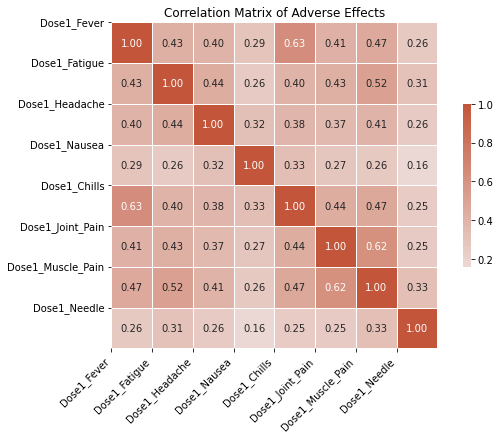

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = y.corr()
f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Adverse Effects')
plt.xticks(range(len(y.columns)), y.columns, rotation=45, ha='right')
plt.yticks(range(len(y.columns)), y.columns)
plt.show()

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Version 1 - 3/18 (original - submitted for milestone)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss:.4f} / Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for each label
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred_binary, average=None)

# Calculate macro-average precision, recall, and F1 score
macro_precision, macro_recall, macro_f1score, _ = precision_recall_fscore_support(y_test, y_pred_binary, average='macro')

# Print the performance metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1score}')
print(f'Macro-average precision: {macro_precision:.4f}')
print(f'Macro-average recall: {macro_recall:.4f}')
print(f'Macro-average F1 score: {macro_f1score:.4f}')

Epoch 1/50
346/346 [==============================] - 6s 11ms/step - loss: 0.5581 - accuracy: 0.1396 - val_loss: 0.5330 - val_accuracy: 0.1462
Epoch 2/50
346/346 [==============================] - 3s 9ms/step - loss: 0.5320 - accuracy: 0.1501 - val_loss: 0.5313 - val_accuracy: 0.1509
Epoch 3/50
346/346 [==============================] - 2s 6ms/step - loss: 0.5273 - accuracy: 0.1550 - val_loss: 0.5293 - val_accuracy: 0.1813
Epoch 4/50
346/346 [==============================] - 3s 7ms/step - loss: 0.5238 - accuracy: 0.1583 - val_loss: 0.5302 - val_accuracy: 0.1476
Epoch 5/50
346/346 [==============================] - 2s 6ms/step - loss: 0.5213 - accuracy: 0.1616 - val_loss: 0.5302 - val_accuracy: 0.1624
Epoch 6/50
346/346 [==============================] - 2s 5ms/step - loss: 0.5192 - accuracy: 0.1650 - val_loss: 0.5313 - val_accuracy: 0.1274
Epoch 7/50
346/346 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.1649 - val_loss: 0.5342 - val_accuracy: 0.1530
Epoch

# Version 2 - 3/19 1:48 AM

- Use a better random seed for reproducibility.
- Use EarlyStopping and ModelCheckpoint callbacks to prevent overfitting and save the best model.
- Use classification_report from scikit-learn to print a more comprehensive report of the model's performance.

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss:.4f} / Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print the performance metrics
print(classification_report(y_test, y_pred))

Epoch 1/50
346/346 [==============================] - 2s 4ms/step - loss: 0.5524 - accuracy: 0.1346 - val_loss: 0.5342 - val_accuracy: 0.1360
Epoch 2/50
346/346 [==============================] - 1s 4ms/step - loss: 0.5275 - accuracy: 0.1300 - val_loss: 0.5334 - val_accuracy: 0.1462
Epoch 3/50
346/346 [==============================] - 2s 5ms/step - loss: 0.5231 - accuracy: 0.1424 - val_loss: 0.5298 - val_accuracy: 0.1277
Epoch 4/50
346/346 [==============================] - 3s 8ms/step - loss: 0.5203 - accuracy: 0.1427 - val_loss: 0.5322 - val_accuracy: 0.1617
Epoch 5/50
346/346 [==============================] - 3s 10ms/step - loss: 0.5172 - accuracy: 0.1478 - val_loss: 0.5331 - val_accuracy: 0.1436
Epoch 6/50
346/346 [==============================] - 2s 7ms/step - loss: 0.5158 - accuracy: 0.1504 - val_loss: 0.5304 - val_accuracy: 0.1621
Epoch 7/50
346/346 [==============================] - 3s 8ms/step - loss: 0.5124 - accuracy: 0.1538 - val_loss: 0.5334 - val_accuracy: 0.1317
Epoch

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VErsion 4: 1:59 AM
- Uses a more complex architecture
- Used dropout layers to prevent overfitting.
- Used class weights to handle imbalanced datasets.
- Experiment with different activation functions and optimization algorithms.
- The compute_sample_weight() function doesn't support multi-label classification directly. Instead, we can compute class weights for each class individually and pass a dictionary of these weights to the fit() method


In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint],
                    class_weight=class_weights) #

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss:.4f} / Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.4).astype(int)  # Originaly 0.5 

# Print the performance metrics
print(classification_report(y_test, y_pred))


Epoch 1/50
346/346 [==============================] - 7s 10ms/step - loss: 1.0221 - accuracy: 0.1712 - val_loss: 0.5472 - val_accuracy: 0.1389
Epoch 2/50
346/346 [==============================] - 2s 7ms/step - loss: 0.9675 - accuracy: 0.1499 - val_loss: 0.5443 - val_accuracy: 0.1324
Epoch 3/50
346/346 [==============================] - 2s 7ms/step - loss: 0.9533 - accuracy: 0.1413 - val_loss: 0.5444 - val_accuracy: 0.1389
Epoch 4/50
346/346 [==============================] - 2s 6ms/step - loss: 0.9464 - accuracy: 0.1308 - val_loss: 0.5405 - val_accuracy: 0.1357
Epoch 5/50
346/346 [==============================] - 1s 4ms/step - loss: 0.9424 - accuracy: 0.1317 - val_loss: 0.5433 - val_accuracy: 0.1292
Epoch 6/50
346/346 [==============================] - 1s 4ms/step - loss: 0.9353 - accuracy: 0.1261 - val_loss: 0.5406 - val_accuracy: 0.1349
Epoch 7/50
346/346 [==============================] - 1s 4ms/step - loss: 0.9313 - accuracy: 0.1350 - val_loss: 0.5381 - val_accuracy: 0.1292
Epoch

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Version 5: 3/19 2:22 AM (graphs are available from v5)
- Observation: Changing the threshold resulted in better f1. Hence, we try to do Threshold paramter turning.
- The best seems to be 0.35

Epoch 1/50
346/346 [==============================] - 3s 6ms/step - loss: 1.0239 - accuracy: 0.1364 - val_loss: 0.5487 - val_accuracy: 0.1494
Epoch 2/50
346/346 [==============================] - 1s 3ms/step - loss: 0.9648 - accuracy: 0.1307 - val_loss: 0.5471 - val_accuracy: 0.1375
Epoch 3/50
346/346 [==============================] - 1s 4ms/step - loss: 0.9522 - accuracy: 0.1273 - val_loss: 0.5464 - val_accuracy: 0.1299
Epoch 4/50
346/346 [==============================] - 1s 4ms/step - loss: 0.9509 - accuracy: 0.1256 - val_loss: 0.5427 - val_accuracy: 0.1313
Epoch 5/50
346/346 [==============================] - 1s 3ms/step - loss: 0.9387 - accuracy: 0.1281 - val_loss: 0.5435 - val_accuracy: 0.1302
Epoch 6/50
346/346 [==============================] - 2s 6ms/step - loss: 0.9375 - accuracy: 0.1241 - val_loss: 0.5410 - val_accuracy: 0.1306
Epoch 7/50
346/346 [==============================] - 2s 7ms/step - loss: 0.9295 - accuracy: 0.1274 - val_loss: 0.5393 - val_accuracy: 0.1169
Epoch 

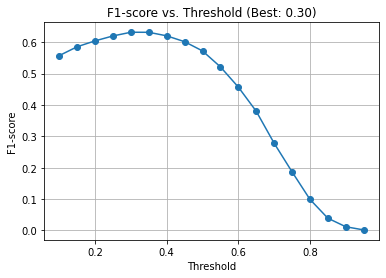

213/213 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.44      0.86      0.58      2159
           1       0.58      0.89      0.70      3457
           2       0.45      0.77      0.57      2325
           3       0.37      0.11      0.17       678
           4       0.43      0.80      0.56      1811
           5       0.42      0.71      0.53      1927
           6       0.50      0.88      0.64      2741
           7       0.66      0.93      0.77      3932

   micro avg       0.51      0.82      0.63     19030
   macro avg       0.48      0.74      0.57     19030
weighted avg       0.52      0.82      0.63     19030
 samples avg       0.40      0.61      0.45     19030



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),   # 
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint],
                    class_weight=class_weights)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss:.4f} / Test accuracy: {accuracy:.4f}')

thresholds = np.arange(0.1, 1, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred = (model.predict(X_test) > threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))

# Find the best threshold
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Plot F1-scores vs. thresholds
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title(f'F1-score vs. Threshold (Best: {best_threshold:.2f})')
plt.grid()
plt.show()

# Make predictions on the test set using the best threshold
y_pred = (model.predict(X_test) > best_threshold).astype(int)

# Print the performance metrics
print(classification_report(y_test, y_pred))

# Version 6 (man. loop)
- Experiment number of epochs
- Result: Don't go over 15 (11 is good)

<ipython-input-37-30956181b11e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
<ipython-input-37-30956181b11e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])


Epoch 1/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6228 / Validation F1: 0.6203
Epoch 2/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6275 / Validation F1: 0.6228
Epoch 3/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6335 / Validation F1: 0.6259
Epoch 4/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6328 / Validation F1: 0.6259
Epoch 5/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6346 / Validation F1: 0.6262
Epoch 6/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6378 / Validation F1: 0.6278
Epoch 7/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6390 / Validation F1: 0.6274
Epoch 8/50
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6422 / Validation F1: 0.6301
Epoch 9/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6413 / Validation F1: 0.6283
Epoch 10/50
323/323 [================

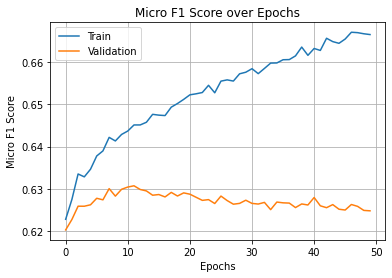

323/323 [==============================] - 0s 1ms/step
Test micro F1 score: 0.6307
              precision    recall  f1-score   support

           0     0.4739    0.7713    0.5871      3253
           1     0.6038    0.8389    0.7022      5275
           2     0.4742    0.6779    0.5581      3487
           3     0.4118    0.0271    0.0508      1035
           4     0.4536    0.7737    0.5719      2753
           5     0.4294    0.6449    0.5155      2903
           6     0.5086    0.8509    0.6367      4138
           7     0.6816    0.8874    0.7710      5997

   micro avg     0.5347    0.7687    0.6307     28841
   macro avg     0.5046    0.6840    0.5492     28841
weighted avg     0.5372    0.7687    0.6221     28841
 samples avg     0.3943    0.5641    0.4245     28841



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score, classification_report
from skmultilearn.model_selection import IterativeStratification

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
# Instantiate the iterative stratification object
stratifier = IterativeStratification(n_splits=2, order=1)

# Get the train and test indices
train_indices, test_indices = next(stratifier.split(X, y))

# Split the data into train and test sets using the indices
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),   # 
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model 
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

train_f1_scores = []
val_f1_scores = []

best_val_f1 = -np.inf

for epoch in range(50):  # 50 epochs
    print(f'Epoch {epoch + 1}/{50}')

    # Train the model for one epoch
    model.fit(X_train, y_train,
              batch_size=16,
              epochs=1,
              verbose=1,
              class_weight=class_weights)

    # Make predictions on the training set
    y_train_pred = (model.predict(X_train) > 0.35).astype(int)
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    train_f1_scores.append(train_f1)

    # Make predictions on the validation set
    y_val_pred = (model.predict(X_test) > 0.35).astype(int)
    val_f1 = f1_score(y_test, y_val_pred, average='micro')
    val_f1_scores.append(val_f1)

    print(f'Train F1: {train_f1:.4f} / Validation F1: {val_f1:.4f}')

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        model.save_weights('best_model.h5')

# Load the best model
model.load_weights('best_model.h5')

# Plot the F1 scores
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Micro F1 Score')
plt.title('Micro F1 Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the test set
y_test_pred = (model.predict(X_test) > 0.35).astype(int)
test_f1 = f1_score(y_test, y_test_pred, average='micro')
print(f'Test micro F1 score: {test_f1:.4f}')

# Print the performance metrics
print(classification_report(y_test, y_test_pred, digits=4))

# Version 6.2 (manual loop
- Experiment batch (batch = 16 is goodd)

<ipython-input-69-c77b44f25fc9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
<ipython-input-69-c77b44f25fc9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])


Training with batch size: 16
Epoch 1/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6239 / Validation F1: 0.6204
Epoch 2/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6296 / Validation F1: 0.6232
Epoch 3/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6320 / Validation F1: 0.6246
Epoch 4/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6344 / Validation F1: 0.6251
Epoch 5/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6376 / Validation F1: 0.6270
Epoch 6/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6390 / Validation F1: 0.6276
Epoch 7/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6396 / Validation F1: 0.6276
Epoch 8/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6396 / Validation F1: 0.6270
Epoch 9/50
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6393 / Validation F1: 0.6266
Epoch 10

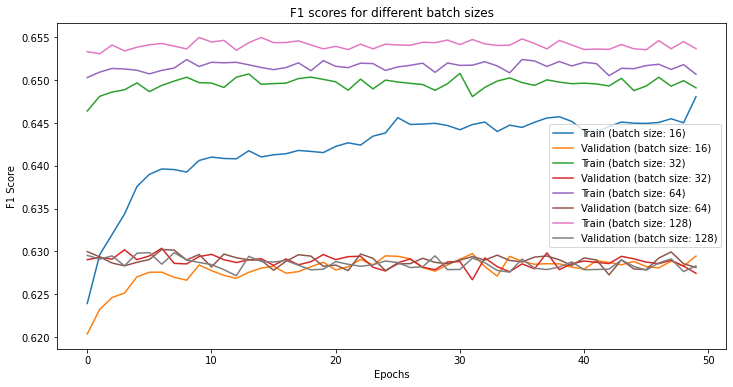

Best batch size: 16
Test micro F1 score: 0.6338


ValueError: ignored

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
# Instantiate the iterative stratification object
stratifier = IterativeStratification(n_splits=2, order=1)

# Get the train and test indices
train_indices, test_indices = next(stratifier.split(X, y))

# Split the data into train and test sets using the indices
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),   # 
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model (same as before)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Define a function to train and evaluate the model for different batch sizes
def train_and_evaluate(batch_size):
    train_f1_scores = []
    val_f1_scores = []

    best_val_f1 = -np.inf

    for epoch in range(50):  # 10 epochs
        print(f'Epoch {epoch + 1}/{50}')

        # Train the model for one epoch
        model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=1,
                  verbose=1,
                  class_weight=class_weights)

        # Make predictions on the training set
        y_train_pred = (model.predict(X_train) > 0.35).astype(int)
        train_f1 = f1_score(y_train, y_train_pred, average='micro')
        train_f1_scores.append(train_f1)

        # Make predictions on the validation set
        y_val_pred = (model.predict(X_test) > 0.35).astype(int)
        val_f1 = f1_score(y_test, y_val_pred, average='micro')
        val_f1_scores.append(val_f1)

        print(f'Train F1: {train_f1:.4f} / Validation F1: {val_f1:.4f}')

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            model.save_weights('best_model.h5')

         # Load the best model
        model.load_weights('best_model.h5')

    return train_f1_scores, val_f1_scores, test_f1

# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128]
batch_size_results = []

for batch_size in batch_sizes:
    print(f'Training with batch size: {batch_size}')
    train_f1_scores, val_f1_scores, test_f1 = train_and_evaluate(batch_size)
    batch_size_results.append((batch_size, train_f1_scores, val_f1_scores, test_f1))

# Plot the training and validation F1 scores for different batch sizes
plt.figure(figsize=(12, 6))
for batch_size, train_f1_scores, val_f1_scores, _ in batch_size_results:
    plt.plot(train_f1_scores, label=f'Train (batch size: {batch_size})')
    plt.plot(val_f1_scores, label=f'Validation (batch size: {batch_size})')

plt.title('F1 scores for different batch sizes')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Evaluate the best model on the test set and print the performance metrics
best_batch_size, _, _, best_test_f1 = max(batch_size_results, key=lambda x: x[3])

print(f'Best batch size: {best_batch_size}')
print(f'Test micro F1 score: {best_test_f1:.4f}')

# Print the performance metrics
print(classification_report(y_test, y_test_pred, digits=4))

# Version 6.3 (manual loop)
Trying out different dropout values
(0.5-0.5-0.3) is good on 5 epochs (takes too long for more epochs)

<ipython-input-22-9f44e119ff9d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
<ipython-input-22-9f44e119ff9d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])


Training with dropout values: (0.3, 0.3, 0.3)
Epoch 1/5
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6287 / Validation F1: 0.6225
Epoch 2/5
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6344 / Validation F1: 0.6267
Epoch 3/5
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6381 / Validation F1: 0.6281
Epoch 4/5
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6386 / Validation F1: 0.6271
Epoch 5/5
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6413 / Validation F1: 0.6273
Training with dropout values: (0.3, 0.3, 0.5)
Epoch 1/5
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6240 / Validation F1: 0.6183
Epoch 2/5
323/323 [==============================] - 0s 1ms/step
Train F1: 0.6310 / Validation F1: 0.6243
Epoch 3/5
323/323 [==============================] - 1s 2ms/step
Train F1: 0.6348 / Validation F1: 0.6266
Epoch 4/5
323/323 [==============================] - 1s 2ms/

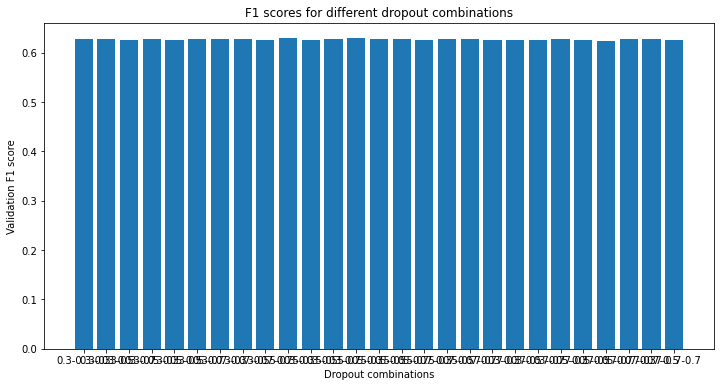

In [ ]:
import itertools

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
# Instantiate the iterative stratification object
stratifier = IterativeStratification(n_splits=2, order=1)

# Get the train and test indices
train_indices, test_indices = next(stratifier.split(X, y))

# Split the data into train and test sets using the indices
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)


# Define a function to create a model with dropout values as input
def create_model(dropout_values):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
        tf.keras.layers.Dropout(dropout_values[0]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_values[1]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_values[2]),
        tf.keras.layers.Dense(8, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    return model


dropout_values = [0.3, 0.5, 0.7]
dropout_combinations = list(itertools.product(dropout_values, repeat=3))

f1_scores = []

for dropout_combo in dropout_combinations:
    print(f"Training with dropout values: {dropout_combo}")
    model = create_model(dropout_combo)

    train_f1_scores = []
    val_f1_scores = []

    best_val_f1 = -np.inf

    for epoch in range(5):  # Reduce epochs to 5 (or else takes too long)
        print(f'Epoch {epoch + 1}/{5}')

        model.fit(X_train, y_train,
                  batch_size=16,
                  epochs=1,
                  verbose=1,
                  class_weight=class_weights)

        y_train_pred = (model.predict(X_train) > 0.35).astype(int)
        train_f1 = f1_score(y_train, y_train_pred, average='micro')
        train_f1_scores.append(train_f1)

        y_val_pred = (model.predict(X_test) > 0.35).astype(int)
        val_f1 = f1_score(y_test, y_val_pred, average='micro')
        val_f1_scores.append(val_f1)

        print(f'Train F1: {train_f1:.4f} / Validation F1: {val_f1:.4f}')

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1

    f1_scores.append((dropout_combo, best_val_f1))

# Plot the F1 scores
dropout_labels = [f"{combo[0]}-{combo[1]}-{combo[2]}" for combo in dropout_combinations]
f1_values = [score[1] for score in f1_scores]

plt.figure(figsize=(12, 6))
plt.bar(dropout_labels, f1_values)
plt.xlabel('Dropout combinations')
plt.ylabel('Validation F1 score')
plt.title('F1 scores for different dropout combinations')
plt.show()


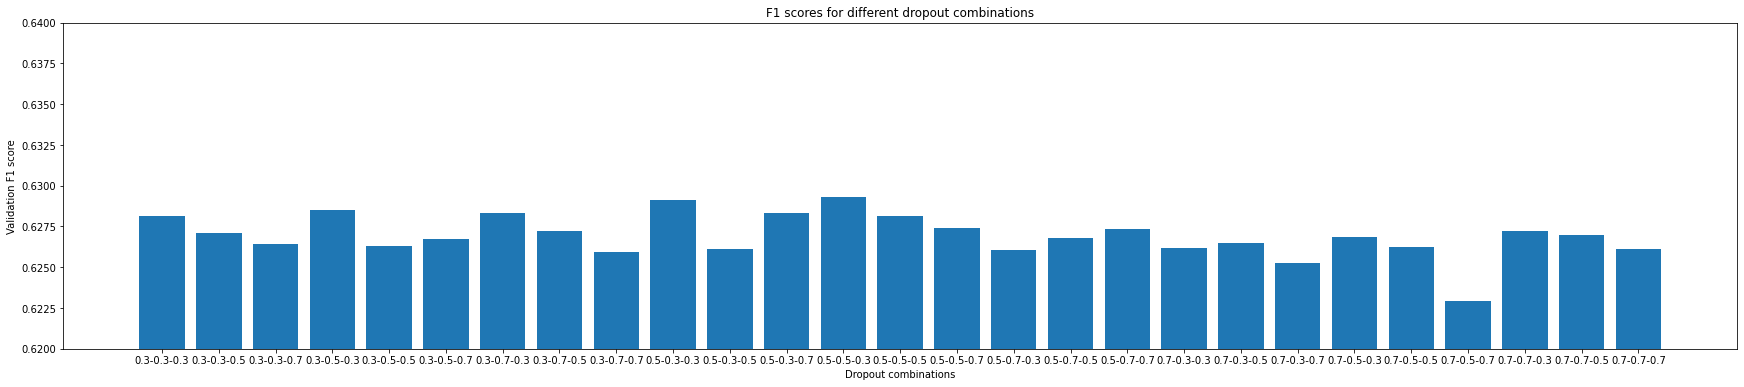

In [ ]:
plt.figure(figsize=(30, 6))
plt.bar(dropout_labels, f1_values)
plt.xlabel('Dropout combinations')
plt.ylabel('Validation F1 score')
plt.title('F1 scores for different dropout combinations')
plt.ylim(0.620, 0.64)  # Set the lower limit of the y-axis to 0.5
plt.show()

# 6.4 (Manual Loop)
- Now we try batch 16, 0.5-0.5-0.3 and stratification and see how it performs 
over 15 epochs with prediction threshold 0.35
- THen, find the best prediction thresholds

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
# Instantiate the iterative stratification object
stratifier = IterativeStratification(n_splits=4, order=1) # 75/25 split

# Get the train and test indices
train_indices, test_indices = next(stratifier.split(X, y))

# Split the data into train and test sets using the indices
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),   # 
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model (same as before)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

train_f1_scores = []
val_f1_scores = []

best_val_f1 = -np.inf

for epoch in range(15):  # 10 epochs
    print(f'Epoch {epoch + 1}/{10}')

    # Train the model for one epoch
    model.fit(X_train, y_train,
              batch_size=16,
              epochs=1,
              verbose=1,
              class_weight=class_weights)

    # Make predictions on the training set
    y_train_pred = (model.predict(X_train) > 0.35).astype(int)
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    train_f1_scores.append(train_f1)

    # Make predictions on the validation set
    y_val_pred = (model.predict(X_test) > 0.35).astype(int)
    val_f1 = f1_score(y_test, y_val_pred, average='micro')
    val_f1_scores.append(val_f1)

    print(f'Train F1: {train_f1:.4f} / Validation F1: {val_f1:.4f}')

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        model.save_weights('best_model.h5')

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test set
y_test_pred = (model.predict(X_test) > 0.35).astype(int)
test_f1 = f1_score(y_test, y_test_pred, average='micro')
print(f'Test micro F1 score: {test_f1:.4f}')

# Print the performance metrics
print(classification_report(y_test, y_test_pred, digits=4))

<ipython-input-52-8454de6a5598>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
<ipython-input-52-8454de6a5598>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])


Epoch 1/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6252 / Validation F1: 0.6311
Epoch 2/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6292 / Validation F1: 0.6338
Epoch 3/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6329 / Validation F1: 0.6374
Epoch 4/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6338 / Validation F1: 0.6371
Epoch 5/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6353 / Validation F1: 0.6364
Epoch 6/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6361 / Validation F1: 0.6372
Epoch 7/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6346 / Validation F1: 0.6352
Epoch 8/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6376 / Validation F1: 0.6372
Epoch 9/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6392 / Validation F1: 0.6383
Epoch 10/10
162/162 [================

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def find_best_thresholds(y_true, y_pred_probs, num_classes, thresholds):
    best_thresholds = [0.5] * num_classes
    best_f1s = [0.0] * num_classes

    for t in thresholds:
        for class_idx in range(num_classes):
            y_pred = (y_pred_probs[:, class_idx] > t).astype(int)
            precision, recall, f1, _ = precision_recall_fscore_support(y_true[:, class_idx], y_pred, average='binary')
            if f1 > best_f1s[class_idx]:
                best_f1s[class_idx] = f1
                best_thresholds[class_idx] = t

    return best_thresholds, best_f1s

y_test_pred_probs = model.predict(X_test)
thresholds = np.arange(0.1, 0.9, 0.05)
best_thresholds, best_f1s = find_best_thresholds(y_test, y_test_pred_probs, 8, thresholds)

print("Best thresholds for each class:")
for i, t in enumerate(best_thresholds):
    print(f"Class {i}: {t:.2f}")

print("Best F1 scores for each class:")
for i, f1 in enumerate(best_f1s):
    print(f"Class {i}: {f1:.4f}")

323/323 [==============================] - 2s 6ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

Best thresholds for each class:
Class 0: 0.40
Class 1: 0.25
Class 2: 0.30
Class 3: 0.20
Class 4: 0.35
Class 5: 0.30
Class 6: 0.35
Class 7: 0.30
Best F1 scores for each class:
Class 0: 0.5863
Class 1: 0.7056
Class 2: 0.5597
Class 3: 0.3140
Class 4: 0.5684
Class 5: 0.5189
Class 6: 0.6396
Class 7: 0.7735


# 6.5
- Apply custom prediction thresholds for each class
- print confusion , AUC ROC, metrics

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split data into train and test sets
# Instantiate the iterative stratification object
stratifier = IterativeStratification(n_splits=4, order=1)

# Get the train and test indices
train_indices, test_indices = next(stratifier.split(X, y))

# Split the data into train and test sets using the indices
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = {}
for i in range(8):
    class_weights[i] = np.sum(y_train[:, i] == 0) / np.sum(y_train[:, i] == 1)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(49,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),   # 
    tf.keras.layers.Dense(8, activation='sigmoid')
])

# Compile the model (same as before)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

train_f1_scores = []
val_f1_scores = []

best_val_f1 = -np.inf

for epoch in range(15):  # 10 epochs
    print(f'Epoch {epoch + 1}/{10}')

    # Train the model for one epoch
    model.fit(X_train, y_train,
              batch_size=16,
              epochs=1,
              verbose=1,
              class_weight=class_weights)

    # Make predictions on the training set
    y_train_pred = (model.predict(X_train) > 0.35).astype(int)
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    train_f1_scores.append(train_f1)

    # Make predictions on the validation set
    y_val_pred = (model.predict(X_test) > 0.35).astype(int)
    val_f1 = f1_score(y_test, y_val_pred, average='micro')
    val_f1_scores.append(val_f1)

    print(f'Train F1: {train_f1:.4f} / Validation F1: {val_f1:.4f}')

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        model.save_weights('best_model.h5')

# Load the best model
model.load_weights('best_model.h5')

# Custom thresholds for each class
class_thresholds = np.array([0.40, 0.25, 0.30, 0.20, 0.35, 0.30, 0.35, 0.30])

# Evaluate the model on the test set with custom thresholds
y_test_pred = (model.predict(X_test) > class_thresholds).astype(int)
test_f1 = f1_score(y_test, y_test_pred, average='micro')
print(f'Test micro F1 score: {test_f1:.4f}')

# Print the performance metrics
print(classification_report(y_test, y_test_pred, digits=4))

<ipython-input-20-c298fbf4d45f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 7:10] = scaler.fit_transform(X_train.iloc[:, 7:10])
<ipython-input-20-c298fbf4d45f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.iloc[:, 7:10] = scaler.transform(X_test.iloc[:, 7:10])


Epoch 1/10
162/162 [==============================] - 1s 5ms/step
Train F1: 0.6252 / Validation F1: 0.6313
Epoch 2/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6303 / Validation F1: 0.6346
Epoch 3/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6341 / Validation F1: 0.6357
Epoch 4/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6338 / Validation F1: 0.6358
Epoch 5/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6352 / Validation F1: 0.6371
Epoch 6/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6370 / Validation F1: 0.6377
Epoch 7/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6361 / Validation F1: 0.6370
Epoch 8/10
162/162 [==============================] - 0s 1ms/step
Train F1: 0.6369 / Validation F1: 0.6370
Epoch 9/10
162/162 [==============================] - 0s 2ms/step
Train F1: 0.6378 / Validation F1: 0.6367
Epoch 10/10
162/162 [================

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for the test set
y_test_prob = model.predict(X_test)

# Calculate the AUC-ROC for each class
roc_auc_scores = []
for i in range(y_test.shape[1]):
    auc = roc_auc_score(y_test[:, i], y_test_prob[:, i])
    roc_auc_scores.append(auc)

print(roc_auc_scores)
# Calculate the average AUC-ROC across all classes
avg_roc_auc = np.mean(roc_auc_scores)

print(f'Average AUC-ROC score for the test set: {avg_roc_auc:.4f}')

162/162 [==============================] - 0s 2ms/step
[0.767493520628011, 0.720175765572036, 0.7145602037331813, 0.7286362981587701, 0.7836083765350965, 0.7221463795894821, 0.7423253128266888, 0.7695242920674332]
Average AUC-ROC score for the test set: 0.7436


In [ ]:
from sklearn.metrics import hamming_loss
hamming_loss_test = hamming_loss(y_test, y_test_pred)
print(hamming_loss_test)

0.33177366175329714


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# Compute confusion matrices
confusion_matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
for i, matrix in enumerate(confusion_matrices):
    print(f"Confusion matrix for class {i}:")
    print(matrix)
    print()
    

Confusion matrix for class 0:
[[2187 1342]
 [ 358 1269]]

Confusion matrix for class 1:
[[ 734 1784]
 [ 219 2419]]

Confusion matrix for class 2:
[[1776 1636]
 [ 392 1352]]

Confusion matrix for class 3:
[[3825  803]
 [ 270  258]]

Confusion matrix for class 4:
[[2537 1232]
 [ 327 1060]]

Confusion matrix for class 5:
[[2272 1434]
 [ 401 1049]]

Confusion matrix for class 6:
[[1502 1585]
 [ 330 1739]]

Confusion matrix for class 7:
[[ 837 1321]
 [ 251 2747]]

